### 복습 
1. drinks.csv 파일 로드 
2. 결측치를 확인 
3. 결측치 데이터를 'OT' 대체
4. 컬럼의 이름을 변경 -> ['국가', '맥주소비량', '위스키소비량', '와인소비량', '도수', '대륙']
5. 대륙별 맥주 소비량의 평균, 최소, 최대, 합계 출력 
6. 도수 컬럼의 전체의 평균보다 대륙별 도수의 평균이 높은 대륙 출력

In [ ]:
import matplotlib.pyplot as plt 
import pandas as pd

In [ ]:
drinks = pd.read_csv("../../csv/drinks.csv")

In [ ]:
## 결측치를 확인 
drinks.info()

In [ ]:
## 결측치의 개수를 출력 
drinks.isna().sum()

In [ ]:
## continent의 데이터중 결측치인 데이터만 확인
flag = drinks['continent'].isna()
drinks.loc[flag, ]

In [ ]:
## 결측치가 포함된 데이터프레임을 확인 
flag2 = drinks.isna().any(axis=1)
drinks.loc[~(flag2),]

In [ ]:
## 결측치 데이터를 'OT' 대체 
## fillna('OT')

drinks['continent'] = drinks['continent'].fillna('OT')

In [ ]:
drinks.isna().sum()

In [ ]:
## 컬럼의 이름을 변경 
drinks.columns = ['국가', '맥주소비량', '위스키소비량', 
                  '와인소비량', '도수', '대륙']

In [ ]:
drinks.head(1)

In [ ]:
group_data = drinks[ ['맥주소비량', '대륙'] ].groupby('대륙')\
    .agg(['mean', 'min', 'max', 'sum'])

In [ ]:
drinks[['맥주소비량', '대륙']].groupby('대륙').describe()

In [ ]:
group_data['맥주소비량']['mean']

In [ ]:
## 전체 데이터에서 도수의 평균 
mean_data = drinks['도수'].mean()

In [ ]:
mean_data

In [ ]:
group_data2 = drinks[['대륙', '도수']].groupby('대륙').mean()

In [ ]:
flag3 = group_data2['도수'] > mean_data

In [ ]:
group_data2.loc[flag3, ]

In [ ]:
## 과연 우리나라의 총술소비량은 몇위인가?
## 그래프 표시 
## 총술소비량이 가장 많은 국가는 어디인가?

#총 술 소비량 컬럼을 생성 
# 맥주소비량 + 위스키소비량 + 와인소비량
drinks['총술소비량'] = drinks['맥주소비량'] + \
    drinks['위스키소비량'] + drinks['와인소비량']

drinks.head(3)

In [56]:
## 총술소비량을 기준으로 내림차순 정렬 
drinks.sort_values('총술소비량', ascending=False, inplace=True)

In [58]:
## 인덱스 초기화 (기존의 인덱스는 제거)
drinks.reset_index(drop=True, inplace=True)

In [63]:
# 우리나라의 순위 
flag = drinks['국가'] == 'South Korea'
drinks.loc[flag].index[0] + 1

99

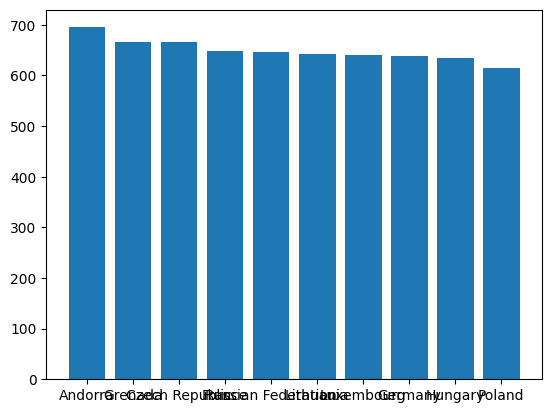

In [66]:
# 총술소비량이 상위 10위까지 데이터를 시각화 
x = drinks['국가'].head(10)
y = drinks['총술소비량'].head(10)

plt.bar(x, y)
plt.show()

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1439: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(y))
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:833: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:693: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))


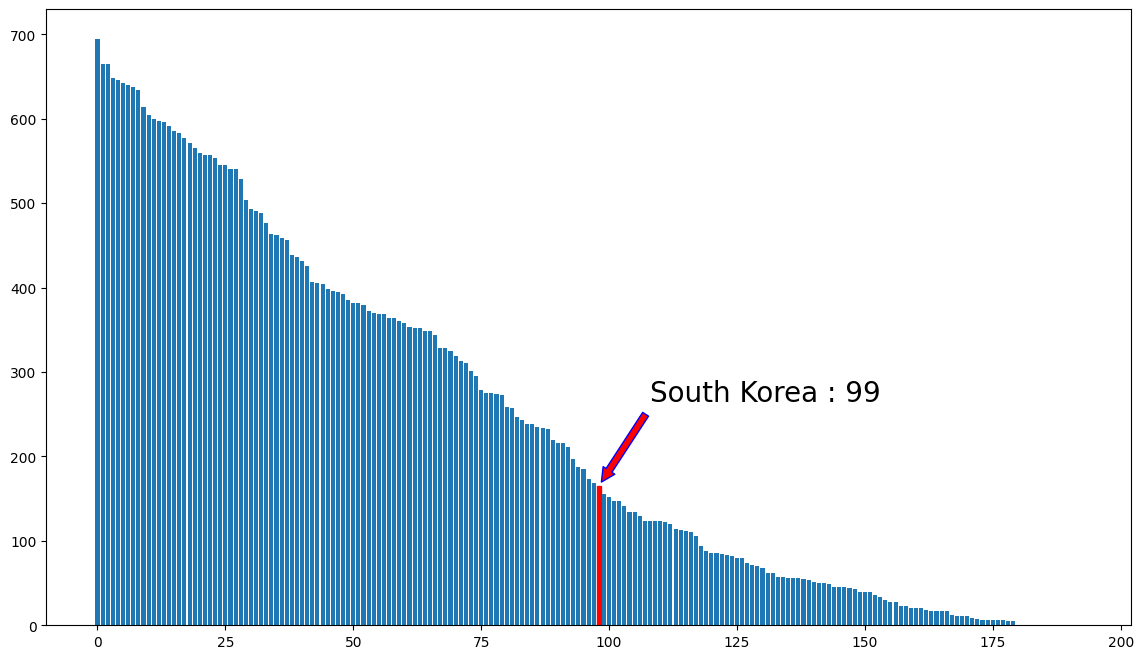

In [75]:
## 총술소비량 막대 그래프 표시 
## 우리나라의 막대의 색상을 변경하고 주석 달기 

x = drinks.index
y = drinks['총술소비량']

# south korea의 인덱스 값을 추출
korea_index = drinks.loc[ 
    drinks['국가'] == 'South Korea',  ].index[0]
# south korea의 총술소비량 추출
korea_total = drinks.loc[
    drinks['국가'] == 'South Korea', '총술소비량'
]

# 그래프 사이즈 변경 
plt.figure(figsize=(14, 8))

bar_list = plt.bar(x, y)

# 한국의 막대를 다른 색으로 변경 
bar_list[korea_index].set_color('red')

## 그래프에 주석 설정 
plt.annotate(
    f'South Korea : {korea_index + 1}', 
    xy = (korea_index, korea_total), 
    xytext= (korea_index+10, korea_total+100), 
    fontsize = 20,
    arrowprops= dict(
        facecolor = 'r',    # 화살표 내부의 색을 지정
        edgecolor = 'b',    # 화살표 외각의 선의 색을 지정
        headwidth = 10,     # 화살표 머리의 너비 
        headlength = 10,    # 화살표 머리의 길이
        width = 5,         # 화살표 꼬리의 너비 
        shrink = 0.05       # 화살표와 주석 사이의 거리  
    )
)

plt.show()

In [77]:
## 우리나라는 과연 얼마나 술을 독하게 먹는가?
drinks.sort_values('도수', ascending=False, inplace=True)

In [78]:
drinks.reset_index(drop=True, inplace=True)

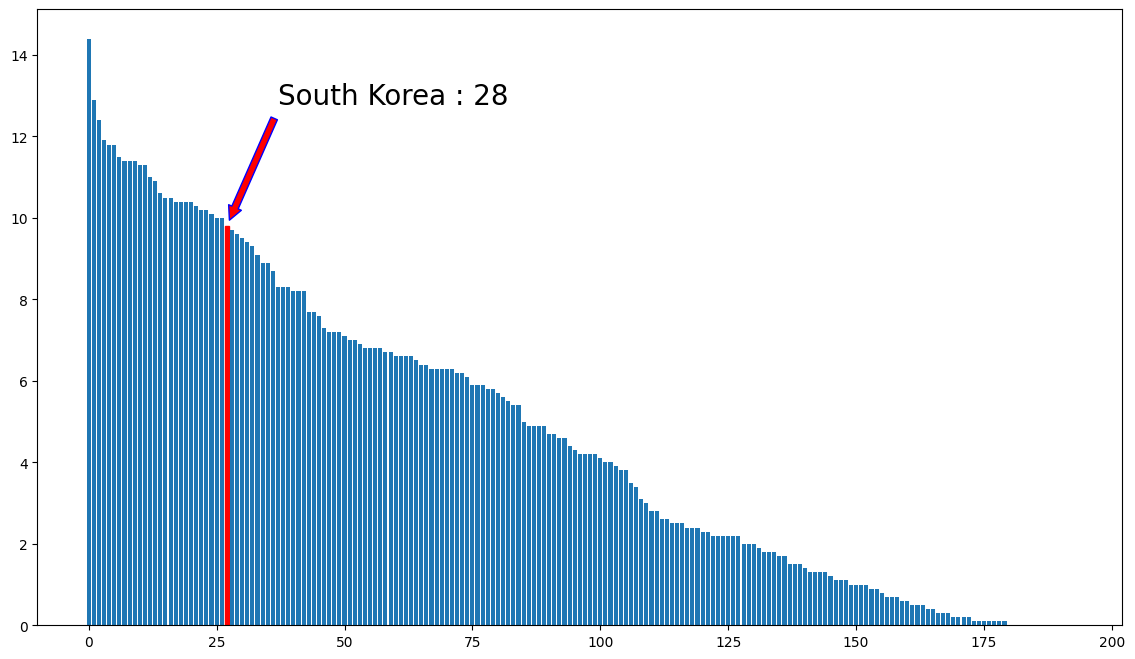

In [80]:
## 총술소비량 막대 그래프 표시 
## 우리나라의 막대의 색상을 변경하고 주석 달기 

x = drinks.index
y = drinks['도수']

# south korea의 인덱스 값을 추출
korea_index = drinks.loc[ 
    drinks['국가'] == 'South Korea',  ].index[0]
# south korea의 총술소비량 추출
korea_total = drinks.loc[
    drinks['국가'] == 'South Korea', '도수'
]

# 그래프 사이즈 변경 
plt.figure(figsize=(14, 8))

bar_list = plt.bar(x, y)

# 한국의 막대를 다른 색으로 변경 
bar_list[korea_index].set_color('red')

## 그래프에 주석 설정 
plt.annotate(
    f'South Korea : {korea_index + 1}', 
    xy = (korea_index, korea_total), 
    xytext= (korea_index+10, korea_total+3), 
    fontsize = 20,
    arrowprops= dict(
        facecolor = 'r',    # 화살표 내부의 색을 지정
        edgecolor = 'b',    # 화살표 외각의 선의 색을 지정
        headwidth = 10,     # 화살표 머리의 너비 
        headlength = 10,    # 화살표 머리의 길이
        width = 5,         # 화살표 꼬리의 너비 
        shrink = 0.05       # 화살표와 주석 사이의 거리  
    )
)

plt.show()

In [81]:
test = drinks[['대륙', '총술소비량']].groupby('대륙')

In [83]:
test

In [84]:
test.get_group('OT')

,대륙,총술소비량
3,OT,665
24,OT,557
36,OT,491
40,OT,462
44,OT,431
49,OT,407
54,OT,385
63,OT,364
66,OT,360
68,OT,352
